In [2]:
import pandas as pd
import sys
sys.path.append('../scripts/') 
from bias import *
from stats import *

In [2]:
g1 = pd.read_csv('../data/reflect_write/raw/mar27-group1.csv')
g2 = pd.read_csv('../data/reflect_write/raw/mar27-group2.csv')
groups = pd.concat([g1, g2])
dmg = pd.read_csv('../data/reflect_write/user_group.csv')
groups.shape, dmg.shape

((55, 19), (52, 2))

In [3]:
full = groups.merge(dmg, on='User', how='left')
full.isnull().sum()

User         0
R1 Date      0
R1 Title     0
R1 Text      0
R2 Date      1
R2 Title     1
R2 Text      1
R3 Date      2
R3 Title     2
R3 Text      2
R4 Date      3
R4 Title     3
R4 Text      3
R5 Date      9
R5 Title     9
R5 Text      9
R6 Date     53
R6 Text     53
R6 Title    53
Group        5
dtype: int64

In [4]:
tmp = groups.merge(dmg, on='User', how='right')
tmp.isnull().sum()

User         0
R1 Date      2
R1 Title     2
R1 Text      2
R2 Date      2
R2 Title     2
R2 Text      2
R3 Date      2
R3 Title     2
R3 Text      2
R4 Date      2
R4 Title     2
R4 Text      2
R5 Date      7
R5 Title     7
R5 Text      7
R6 Date     50
R6 Text     50
R6 Title    50
Group        0
dtype: int64

In [5]:
full.User.unique()

array(['09karn', '01iaon', '19iden', '18jarn', '06uerg', '20uebe',
       '31thil', '20NERN', '31ierg', '22eren', '30narn', '02alrn',
       '06elrn', '29kach', '25narn', '24kaau', '25rarn', '03darg',
       '16nael', '05nell', '12RERN', '03tarn', '07hach', '04sern',
       '04idrn', '02nern', '18jern', '02nirn', '22kaon', '26nelp',
       '20iarn', '06iaen', '07bach', '29sarn', '25serf', '26rarn',
       '02naje', '02lael', '18kaca', '23neau', '06tarn', '27enrt',
       '09narn', '18rain', '15aneg', '10zarn', '22rerg', '04elrn',
       '19leal', '21iach', '01arrn', '19dien', '26karn', '04lern',
       '29tern'], dtype=object)

In [6]:
tmp.User.unique()

array(['24kaau', '06elrn', '29kach', '18jarn', '16nael', '01iaon',
       '04idrn', '05nell', '03darg', '30narn', '04sern', '07hach',
       '25rnra', '20uebe', '06uerg', '25narn', '20NERN', '10zarn',
       '29tern', '26nelp', '31thil', '15aneg', '25serf', '02lael',
       '02naje', '26karn', '18jern', '18kaca', '23neau', '27enrt',
       '06iaen', '18rain', '04lern', '29sarn', '26rarn', '20iarn',
       '02nirn', '22kaon', '19leal', '06tarn', '22rerg', '21iach',
       '09karn', '09narn', '02alrn', '07bach', '19iden', '22eren',
       '31ierg', '25rarn', '26sarn', '02nern'], dtype=object)

In [7]:
tmp[tmp['R1 Date'].isnull()]

,User,R1 Date,R1 Title,R1 Text,R2 Date,R2 Title,R2 Text,R3 Date,R3 Title,R3 Text,R4 Date,R4 Title,R4 Text,R5 Date,R5 Title,R5 Text,R6 Date,R6 Text,R6 Title,Group
12,25rnra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
50,26sarn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
# user don't have a group number, 3 did not complete the 5 weeks writing
# 12RERN - Thursday group 0
full[full.Group.isnull()]

,User,R1 Date,R1 Title,R1 Text,R2 Date,R2 Title,R2 Text,R3 Date,R3 Title,R3 Text,R4 Date,R4 Title,R4 Text,R5 Date,R5 Title,R5 Text,R6 Date,R6 Text,R6 Title,Group
20,12RERN,"Thursday, February 22, 2024",Modulstart WPRO,Heute hatten wir die erste Veranstaltung im Mo...,"Thursday, February 29, 2024",Prozessidentifikation Reflexion,Wir haben heute die&nbsp; Prozessidentifikatio...,"Friday, March 8, 2024",Reflexion Einheit 3,Wir hatten diese Woche die Einheit 3 im Selbst...,"Saturday, March 16, 2024",BPMN Vertiefung,Diese Woche haben wir die Einheit 4 im Selbsts...,"Saturday, March 23, 2024",Theorietiefe verstehen,Diese Woche haben wir die Einheit 5 im Selbsts...,NaN,NaN,NaN,NaN
21,03tarn,"Thursday, February 29, 2024",Prozessmanagement Reflexion,Heute morgen hatten wir im Prozessmanagement a...,"Sunday, March 10, 2024",Self-Learning Erfahrung,"Heute, 10.03.2024, habe ich die Selflearning E...","Friday, March 15, 2024",Reflexion über BPMN,Gestern Abend habe ich von zuhause aus die Sel...,"Monday, March 25, 2024",Lernprozess Reflexion,Am 24.03.2024 habe ich die Selflearning Einhei...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,04elrn,2/23/24 10:40,Reflexion zur Case Study,Am Freitagmorgen haben wir im Modul WPRO eine ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,01arrn,2/23/24 18:11,Digitalisierung in Gent,Gent ist ein Beispiel für die Probleme und Met...,3/1/24 16:24,Prozessverständnis entwickeln,"Die Vorlesung hat mich gelehrt, wie wichtig es...",3/10/24 12:15,Prozessmodellierung Reflexion,In der\nSelbstlerneinheit zum Prozessmanagemen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,19dien,2/25/24 14:48,Prozessoptimierung Ghent,Ich konnte\nleider aufgrund einer akuten Bronc...,2/25/24 17:21,Innere Betrachtungen,"In der zweiten Lektion ging es darum, Geschäft...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
clean = full[~full.User.isin(['04elrn', '01arrn', '19dien'])]
clean.shape

(52, 20)

In [10]:
clean.groupby('Group').size()

Group
0.0    26
1.0    24
dtype: int64

In [11]:
clean.isna().sum()

User         0
R1 Date      0
R1 Title     0
R1 Text      0
R2 Date      0
R2 Title     0
R2 Text      0
R3 Date      0
R3 Title     0
R3 Text      0
R4 Date      0
R4 Title     0
R4 Text      0
R5 Date      6
R5 Title     6
R5 Text      6
R6 Date     50
R6 Text     50
R6 Title    50
Group        2
dtype: int64

# Process 

In [12]:
def transform_df(data):
    # Transforming the data as per the instructions:
    # 1. Splitting the dataframe into separate dataframes for each reflection (R1, R2, ..., R5)
    # 2. Renaming columns to "User", "Date", "Title", "Text", "week"
    # 3. Concatenating all the dataframes into one, with a new "week" column indicating the original reflection week (R1, R2, ..., R5)

    # Creating a list to hold the transformed dataframes
    transformed_dfs = []

    # Iterating over the reflection weeks (R1, R2, ..., R5)
    for i in range(1, 6):
        week = f'R{i}'
        cols = [f'{week} Date', f'{week} Title', f'{week} Text']
        # Creating a new dataframe for the current week
        df_week = data[['User'] + cols].copy()
        # Renaming columns
        df_week.rename(columns={
            f'{week} Date': 'Date',
            f'{week} Title': 'Title',
            f'{week} Text': 'Text'
        }, inplace=True)
        # Adding the 'week' column
        df_week['Week'] = week
        # Appending to the list of transformed dataframes
        transformed_dfs.append(df_week)

    # Concatenating all the transformed dataframes
    transformed_data = pd.concat(transformed_dfs, ignore_index=True)

    # Dropping rows where Date is NaN, as they represent missing entries
    transformed_data.dropna(subset=['Date'], inplace=True)
    return transformed_data


In [13]:
trans_group = transform_df(full)
trans_group.shape

(260, 5)

In [14]:
trans_group = trans_group.merge(dmg, on='User', how='left')
trans_group.groupby('Week').size()

Week
R1    55
R2    54
R3    53
R4    52
R5    46
dtype: int64

In [15]:
trans_group

,User,Date,Title,Text,Week,Group
0,09karn,"Thursday, February 22, 2024",Reflexion und Vorsatz,Ich habe eine Fallstudie für den Unterricht ge...,R1,1.0
1,01iaon,"Thursday, February 22, 2024",Reflexion Case-Study,Beschreibung: Case-Study aus der ersten Vorles...,R1,1.0
2,19iden,"Thursday, February 22, 2024",Prozessreflexion und Kundenansicht,Aus dem Unterricht / aus der Case Studies kann...,R1,1.0
3,18jarn,"Thursday, February 22, 2024",Semesterstart Reflexion,Heute Vormittag haben die Vorlesungen des 4. S...,R1,1.0
4,06uerg,"Thursday, February 22, 2024",Prozessmanagement Reflexion,Ich habe heute die Einführung in das Prozessma...,R1,1.0
...,...,...,...,...,...,...
255,10zarn,3/23/24 1:40,BPMN-Erkenntnisse,Selbstreflexion 4 von Mussa Khan Afridi (23.03...,R5,0.0
256,22rerg,3/24/24 17:49,Reflexion Prozessmodellierung,Reflexion Prozessoptimierung - Einheit 51. Bes...,R5,0.0
257,19leal,3/15/24 17:41,Selbststudium Reflexion,In der vierten Woche ging es um die Anwendung ...,R5,0.0
258,21iach,3/26/24 21:43,Zeitmanagement Herausforderungen,Diese Woche hatte ich keine Zeit das Selbststu...,R5,0.0


In [16]:
full_bias = clean_calc_bias(trans_group, 'Text')
full_bias.shape

/Users/su/Desktop/writing bias/notebooks/../scripts/bias.py:45: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 45 of the file /Users/su/Desktop/writing bias/notebooks/../scripts/bias.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  sentences = BeautifulSoup(text).get_text(" ")


(260, 15)

In [17]:
full_bias.groupby('Week').size()

Week
R1    55
R2    54
R3    53
R4    52
R5    46
dtype: int64

In [25]:
full_bias

,User,Date,Title,Text,Week,Group,Text_clean,word_gender,word_dict,total_words,total_unique_words,total_m_cooc,total_f_cooc,bias_records,bias_score
0,09karn,"Thursday, February 22, 2024",Reflexion und Vorsatz,Ich habe eine Fallstudie für den Unterricht ge...,R1,1.0,fallstudie unterricht gelesen jedoch überfloge...,"{'fallstudie': {'m': 1e-06, 'f': 1e-06, 'femal...","{'fallstudie': 4, 'unterricht': 2, 'gelesen': ...",53,46,19.000046,0.000046,"{'fallstudie': {'m': 1e-06, 'f': 1e-06, 'femal...",-7.2248
1,01iaon,"Thursday, February 22, 2024",Reflexion Case-Study,Beschreibung: Case-Study aus der ersten Vorles...,R1,1.0,beschreibung casestudy ersten vorlesunggefühle...,"{'beschreibung': {'m': 1e-06, 'f': 1e-06, 'fem...","{'beschreibung': 1, 'casestudy': 6, 'ersten': ...",60,52,0.000052,0.000052,"{'beschreibung': {'m': 1e-06, 'f': 1e-06, 'fem...",0.0000
2,19iden,"Thursday, February 22, 2024",Prozessreflexion und Kundenansicht,Aus dem Unterricht / aus der Case Studies kann...,R1,1.0,unterricht case studies herausnehmen überdenke...,"{'unterricht': {'m': 1e-06, 'f': 1e-06, 'femal...","{'unterricht': 1, 'case': 2, 'studies': 2, 'he...",59,52,0.000052,0.000052,"{'unterricht': {'m': 1e-06, 'f': 1e-06, 'femal...",0.0000
3,18jarn,"Thursday, February 22, 2024",Semesterstart Reflexion,Heute Vormittag haben die Vorlesungen des 4. S...,R1,1.0,heute vormittag vorlesungen semesters begonnen...,"{'heute': {'m': 1e-06, 'f': 1e-06, 'female': [...","{'heute': 1, 'vormittag': 2, 'vorlesungen': 2,...",128,108,0.000108,0.000108,"{'heute': {'m': 1e-06, 'f': 1e-06, 'female': [...",0.0000
4,06uerg,"Thursday, February 22, 2024",Prozessmanagement Reflexion,Ich habe heute die Einführung in das Prozessma...,R1,1.0,heute einführung prozessmanagement modul erhal...,"{'heute': {'m': 1e-06, 'f': 1e-06, 'female': [...","{'heute': 1, 'einführung': 1, 'prozessmanageme...",97,81,0.000081,0.000081,"{'heute': {'m': 1e-06, 'f': 1e-06, 'female': [...",0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,10zarn,3/23/24 1:40,BPMN-Erkenntnisse,Selbstreflexion 4 von Mussa Khan Afridi (23.03...,R5,0.0,selbstreflexion mussa khan afridi letzten erfa...,"{'selbstreflexion': {'m': 1e-06, 'f': 1e-06, '...","{'selbstreflexion': 1, 'mussa': 1, 'khan': 1, ...",127,120,0.000120,0.000120,"{'selbstreflexion': {'m': 1e-06, 'f': 1e-06, '...",0.0000
256,22rerg,3/24/24 17:49,Reflexion Prozessmodellierung,Reflexion Prozessoptimierung - Einheit 51. Bes...,R5,0.0,reflexion prozessoptimierung einheit beschreib...,"{'reflexion': {'m': 1e-06, 'f': 1e-06, 'female...","{'reflexion': 1, 'prozessoptimierung': 2, 'ein...",221,181,0.000181,19.000181,"{'reflexion': {'m': 1e-06, 'f': 1e-06, 'female...",10.1833
257,19leal,3/15/24 17:41,Selbststudium Reflexion,In der vierten Woche ging es um die Anwendung ...,R5,0.0,vierten woche ging anwendung xor andgateways s...,"{'vierten': {'m': 1e-06, 'f': 1e-06, 'female':...","{'vierten': 1, 'woche': 1, 'ging': 1, 'anwendu...",76,72,0.000072,0.000072,"{'vierten': {'m': 1e-06, 'f': 1e-06, 'female':...",0.0000
258,21iach,3/26/24 21:43,Zeitmanagement Herausforderungen,Diese Woche hatte ich keine Zeit das Selbststu...,R5,0.0,woche zeit selbststudium tag erledigen freiges...,"{'woche': {'m': 1e-06, 'f': 1e-06, 'female': [...","{'woche': 2, 'zeit': 3, 'selbststudium': 2, 't...",80,68,0.000068,0.000068,"{'woche': {'m': 1e-06, 'f': 1e-06, 'female': [...",0.0000


In [36]:
full_bias.to_csv('../data/reflect_write/reflect_gpt.csv', index=False)

In [34]:
full_bias.Text_clean.to_csv('../data/reflect_write/weat/reflect_gpt_full.txt', index=False)

# WEAT

In [35]:
!python weat_de_cooc.py \
    --data "/Users/su/Desktop/writing bias/data/reflect_write/weat/reflect_gpt_full.txt" \
    --output "/Users/su/Desktop/writing bias/output/weat" \
    --processing_cores 7 \
    --tests 1 2 3 4 5 6 7 8 9 10

Please make sure that your input texts are whitespace separated tokens. The script might not work correctly otherwise.
Generating target-association test pairs...
Extracting candidate posts...
100%|█████████████████████████████████████| 7557/7557 [00:03<00:00, 2095.75it/s]
candidates [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 

In [18]:
full.groupby(['Group']).User.nunique()

Group
0.0    26
1.0    24
Name: User, dtype: int64

In [19]:
# set User is '12RERN' group to 0
full.loc[full.User == '12RERN', 'Group'] = 0
full.loc[full.User == '03tarn', 'Group'] = 0

In [20]:
full.groupby('Group').size()

Group
0.0    28
1.0    24
dtype: int64

In [21]:
users = ['03tarn', '04elrn', '01arrn', '19dien']
full[full.User.isin(users)]

,User,R1 Date,R1 Title,R1 Text,R2 Date,R2 Title,R2 Text,R3 Date,R3 Title,R3 Text,R4 Date,R4 Title,R4 Text,R5 Date,R5 Title,R5 Text,R6 Date,R6 Text,R6 Title,Group
21,03tarn,"Thursday, February 29, 2024",Prozessmanagement Reflexion,Heute morgen hatten wir im Prozessmanagement a...,"Sunday, March 10, 2024",Self-Learning Erfahrung,"Heute, 10.03.2024, habe ich die Selflearning E...","Friday, March 15, 2024",Reflexion über BPMN,Gestern Abend habe ich von zuhause aus die Sel...,"Monday, March 25, 2024",Lernprozess Reflexion,Am 24.03.2024 habe ich die Selflearning Einhei...,NaN,NaN,NaN,NaN,NaN,NaN,0.0
47,04elrn,2/23/24 10:40,Reflexion zur Case Study,Am Freitagmorgen haben wir im Modul WPRO eine ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,01arrn,2/23/24 18:11,Digitalisierung in Gent,Gent ist ein Beispiel für die Probleme und Met...,3/1/24 16:24,Prozessverständnis entwickeln,"Die Vorlesung hat mich gelehrt, wie wichtig es...",3/10/24 12:15,Prozessmodellierung Reflexion,In der\nSelbstlerneinheit zum Prozessmanagemen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,19dien,2/25/24 14:48,Prozessoptimierung Ghent,Ich konnte\nleider aufgrund einer akuten Bronc...,2/25/24 17:21,Innere Betrachtungen,"In der zweiten Lektion ging es darum, Geschäft...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
full[full.User.isin(users)].groupby('User').size()

User
01arrn    1
03tarn    1
04elrn    1
19dien    1
dtype: int64

In [23]:
# full.to_csv('../data/reflect_write/text_group.csv', index=False)

# Bias calc

In [90]:
full_bias = clean_calc_bias(trans_group, 'Text')
full_bias.shape

/Users/su/Desktop/writing bias/notebooks/../scripts/bias.py:45: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 45 of the file /Users/su/Desktop/writing bias/notebooks/../scripts/bias.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  sentences = BeautifulSoup(text).get_text(" ")


(260, 15)

In [91]:
full_bias.to_csv("../data/reflect_write/gpt4_reflect_genbit.csv")
full_bias.Text_clean.to_csv("../data/reflect_write/weat/gpt4_reflect_genbit.txt", index=False, header=False)

In [92]:
full_bias.bias_score.describe()

count    260.000000
mean      -0.506195
std        5.305523
min      -10.209600
25%        0.000000
50%        0.000000
75%        0.000000
max       10.189800
Name: bias_score, dtype: float64

In [93]:
!python weat_de_cooc.py \
    --data "/Users/su/Desktop/biasedu/data/reflect_write/weat/gpt4_reflect_genbit.txt" \
    --output "/Users/su/Desktop/biasedu/output/weat" \
    --processing_cores 7 \
    --tests 1 2 3 4 5 6 7 8 9 10

Traceback (most recent call last):
  File "/Users/su/Desktop/writing bias/notebooks/weat_de_cooc.py", line 51, in <module>
    with open(args.data, "r") as f:
         ^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/Users/su/Desktop/biasedu/data/reflect_write/weat/gpt4_reflect_genbit.txt'


## Analysis

In [37]:
full_bias.bias_score.describe()

count    260.00000
mean      -0.43318
std        5.31101
min      -10.20050
25%        0.00000
50%        0.00000
75%        0.00000
max       10.18330
Name: bias_score, dtype: float64

In [95]:
full_bias_plot = full_bias.copy()
full_bias_plot['Group'] = full_bias_plot.Group.apply(lambda x: 'Adaptive' if x == 0.0 else 'Adaptive + Conversation')

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5')]

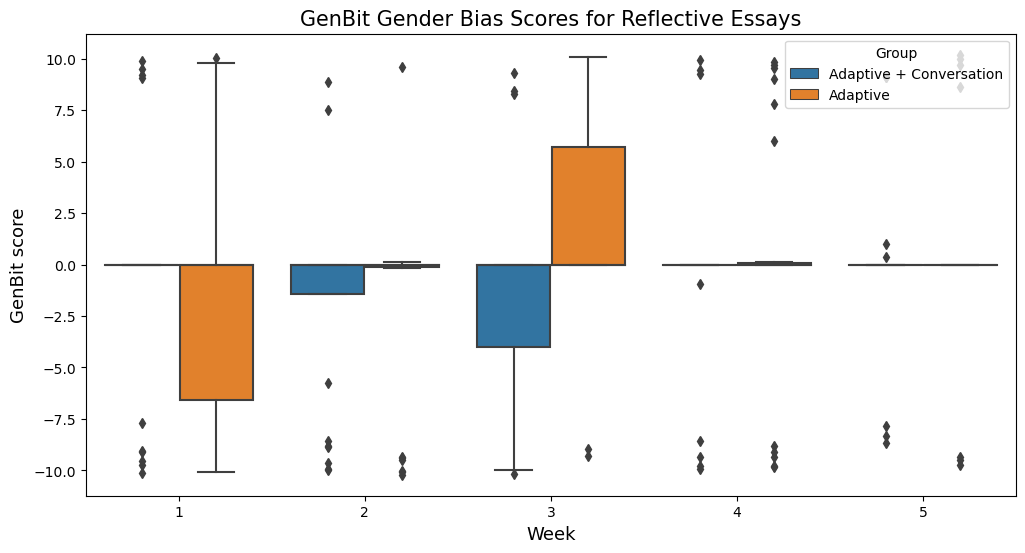

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=full_bias_plot, x="Week", y="bias_score", hue="Group")
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('GenBit Gender Bias Scores for Reflective Essays', fontsize=15)
plt.ylabel('GenBit score', fontsize=13)
plt.xlabel('Week', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = '1'
labels[1] = '2'
labels[2] = '3'
labels[3] = '4'
labels[4] = '5'
# labels[1] = 'TG4: Conversation + Adaptive'
# change legend label
# plt.legend(title='Group', loc='lower right', labels=['Adaptive', 'Adaptive + Conversation'])
# change figure size
plt.gcf().set_size_inches(12, 6)
plt.gca().set_xticklabels(labels)

/var/folders/b9/7hwy61rs41511yrn274_d5qm0000gn/T/ipykernel_85010/318190726.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5')]

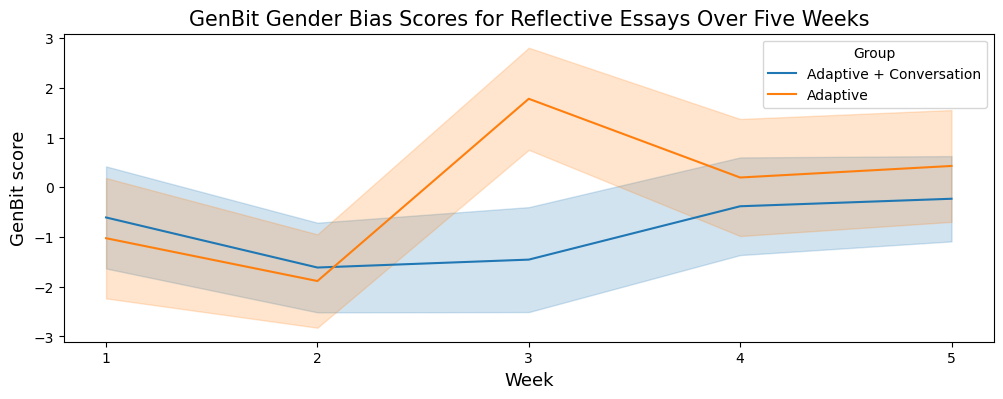

In [97]:
sns.lineplot(data=full_bias_plot, x="Week", y="bias_score", hue="Group", errorbar='se')
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('GenBit Gender Bias Scores for Reflective Essays Over Five Weeks', fontsize=15)
plt.ylabel('GenBit score', fontsize=13)
plt.xlabel('Week', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = '1'
labels[1] = '2'
labels[2] = '3'
labels[3] = '4'
labels[4] = '5'
# labels[1] = 'TG4: Conversation + Adaptive'
# change legend label
# plt.legend(title='Group', loc='lower right', labels=['Adaptive', 'Adaptive + Conversation'])
# change figure size
plt.gcf().set_size_inches(12, 4)
plt.gca().set_xticklabels(labels)

/var/folders/b9/7hwy61rs41511yrn274_d5qm0000gn/T/ipykernel_85010/1610671858.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=full_bias, x="Week", y="bias_score", hue="Group", ci='sd')


[Text(0, 0, 'R1'),
 Text(1, 0, 'R2'),
 Text(2, 0, 'R3'),
 Text(3, 0, 'R4'),
 Text(4, 0, 'R5')]

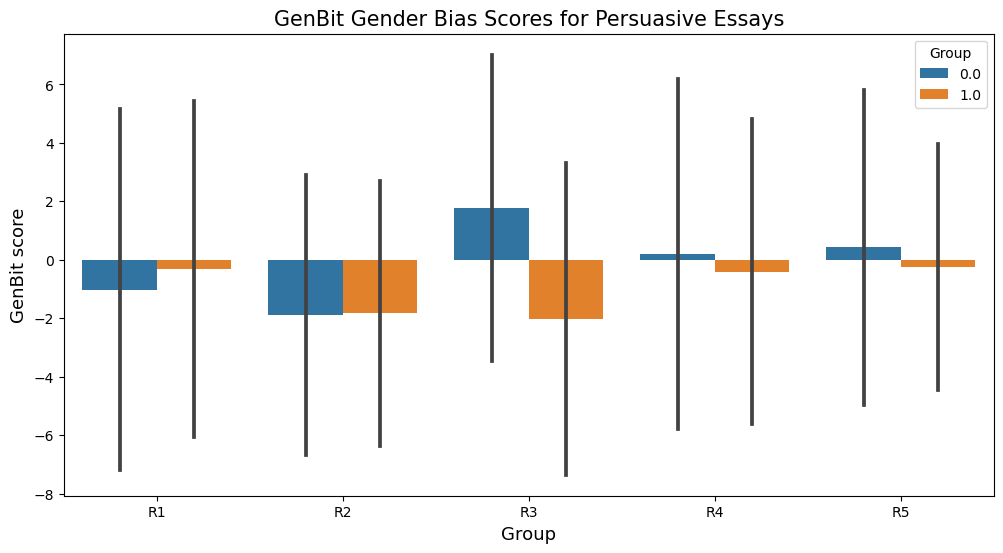

In [98]:
sns.barplot(data=full_bias, x="Week", y="bias_score", hue="Group", ci='sd')
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('GenBit Gender Bias Scores for Persuasive Essays', fontsize=15)
plt.ylabel('GenBit score', fontsize=13)
plt.xlabel('Group', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
# labels[0] = 'TG3: Adaptive'
# labels[1] = 'TG4: Conversation + Adaptive'
# change figure size
plt.gcf().set_size_inches(12, 6)
plt.gca().set_xticklabels(labels)

In [99]:
# bias_full = pd.read_csv('../data/reflect_write/bias_group.csv')
# bias_full.shape

In [102]:
g1 = full_bias[full_bias.Group == 0]
g2 = full_bias[full_bias.Group == 1]
g1.shape, g2.shape, g1.User.nunique(), g2.User.nunique()

((127, 15), (118, 15), 26, 24)

## conversations

In [15]:
import sys
sys.path.append('../scripts/') 
from bias import *
from stats import *

In [3]:
conversations = pd.read_csv('../data/reflect_write/conversations.csv')
conversations.rename(columns={'conv_id': 'User'}, inplace=True)
conversations.dropna(axis=1, how='all', inplace=True)
conversations.shape

(150, 9)

In [4]:
conversations

,User,id,title,studyGroup,time,text,message,user,system
0,09karn,0,Reflexion und Vorsatz,1.0,1.708598e+09,Ich habe eine Fallstudie für den Unterricht ge...,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
1,09karn,1,Prozesskunst Verstehen,1.0,1.709203e+09,Die Prozesslandkarte ist sehr wichtig um mit d...,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
2,01iaon,0,Reflexion Case-Study,1.0,1.708598e+09,Beschreibung: Case-Study aus der ersten Vorles...,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
3,01iaon,1,Prozessreflexion Erfahrungen,1.0,1.709205e+09,Reflexion zur ProzessidentifikationBeschreibun...,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
4,19iden,0,Prozessreflexion und Kundenansicht,1.0,1.708598e+09,Aus dem Unterricht / aus der Case Studies kann...,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
...,...,...,...,...,...,...,...,...,...
145,26karn,1,Geschäftsprozesse optimieren,2.0,1.709288e+09,"Heute haben wir gelernt, wie man Geschäftsproz...","[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
146,Anuschka,0,Laufende Reflexion,1.0,1.709216e+09,NaN,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
147,27cakl,0,Laufende Reflexion,2.0,1.709288e+09,NaN,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
148,18kca,0,Laufende Reflexion,2.0,1.709288e+09,NaN,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."


In [5]:
conversations.system.unique()

array(['Hallo! Ich bin dein MindBuddy. Ich bin hier, um dir zu helfen, den Prozess des reflektierenden Denkens mithilfe des Gibbs-Reflexionszyklus zu durchlaufen. Hier kannst du deine Fähigkeiten zur Reflexion üben und verbessern. Ich werde dir Feedback geben, damit du deinen Reflexionsprozess besser verstehen und optimieren kannst. Bevor wir loslegen, empfehle ich dir, mehr über reflektierendes Denken oder den Gibbs-Reflexionszyklus zu erfahren!\nDer Gibbs-Reflexionszyklus besteht aus sechs Phasen:\nBeschreibung: Dieser Abschnitt enthält eine Darstellung des Ereignisses, über das der Lernende nachdenkt.\nGefühle: Dieser Abschnitt enthält alle Gefühle, die die Lernenden vor, zum Zeitpunkt und nach dem Ereignis hatten sowie ihre Gedanken, als sie sich in der Situation befanden.\nBewertung: Dieser Abschnitt enthält eine ehrliche Meinung zu den positiven oder negativen Punkten der Antwort, die der Lernende zum Zeitpunkt der Veranstaltung gegeben hat.\nAnalyse: Dieser Abschnitt enthält mög

In [7]:
conversations.shape

(150, 10)

In [12]:
# for each row in conversations.system, extract text after "Feedback zu Ihrem Text:\nFantastisch gemacht mit deinem reflektierenden Text!" and store in a new columns called 'gpt-feedback'
conversations['feedback'] = conversations.system.str.extract(r'Feedback zu Ihrem Text:\n(.*)')
conversations['feedback'].isnull().sum()

43

In [13]:
conversations[conversations['feedback'].isnull()].system.tolist()

['Hallo! Ich bin dein MindBuddy. Ich bin hier, um dir zu helfen, den Prozess des reflektierenden Denkens mithilfe des Gibbs-Reflexionszyklus zu durchlaufen. Hier kannst du deine Fähigkeiten zur Reflexion üben und verbessern. Ich werde dir Feedback geben, damit du deinen Reflexionsprozess besser verstehen und optimieren kannst. Bevor wir loslegen, empfehle ich dir, mehr über reflektierendes Denken oder den Gibbs-Reflexionszyklus zu erfahren!\nReflektierendes Denken ist ein Prozess, bei dem Erfahrungen, Gedanken und Gefühle untersucht und interpretiert werden, um ein tieferes Verständnis zu erlangen. Dazu gehört es, auf eine Erfahrung zurückzublicken, ihre Auswirkungen zu analysieren und zu überlegen, wie sie die eigenen Überzeugungen und Handlungen beeinflusst. Reflektiertes Denken fördert persönliches Wachstum, kritisches Denken und kontinuierliches Lernen.\nReflektierendes Denken ist ein Prozess, bei dem Erfahrungen, Gedanken und Gefühle untersucht und interpretiert werden, um ein tie

In [18]:
conversations_feedback = conversations[~conversations['feedback'].isnull()]
reflective_gpt_feedback = clean_calc_bias(conversations_feedback, 'feedback')

/Users/su/Desktop/writing bias/notebooks/../scripts/bias.py:45: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 45 of the file /Users/su/Desktop/writing bias/notebooks/../scripts/bias.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  sentences = BeautifulSoup(text).get_text(" ")
/Users/su/Desktop/writing bias/notebooks/../scripts/bias.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c

In [20]:
conversations_feedback.bias_score.describe()

count    107.000000
mean       0.097198
std        0.707739
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.308900
Name: bias_score, dtype: float64

<Axes: >

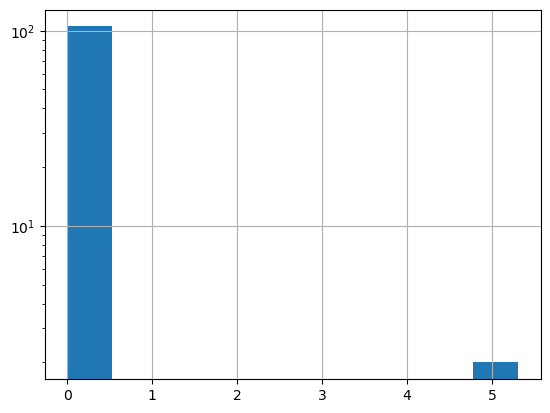

In [23]:
conversations_feedback.bias_score.hist(log=True)

In [24]:
conversations_unique = conversations.drop_duplicates(subset=['system'])
conversations_unique.shape

(115, 9)

In [79]:
system_repeat = ["Hallo! Ich bin dein MindBuddy. Ich bin hier, um dir zu helfen, den Prozess des reflektierenden Denkens mithilfe des Gibbs-Reflexionszyklus zu durchlaufen. Hier kannst du deine Fähigkeiten zur Reflexion üben und verbessern. Ich werde dir Feedback geben, damit du deinen Reflexionsprozess besser verstehen und optimieren kannst. Bevor wir loslegen, empfehle ich dir, mehr über reflektierendes Denken oder den Gibbs-Reflexionszyklus zu erfahren!", 
                 "Aktionsplan: Dieser Abschnitt enthält Meinungen darüber, was die Der Lernende würde sich beim nächsten Mal, wenn er mit einer ähnlichen Situation konfrontiert wird, anders verhalten.",
                 "Analyse: Dieser Abschnitt enthält mögliche Gründe für die Punkte im Abschnitt „Bewertung“ erwähnt. Die Lernenden können auf Referenzen verweisen, die die angegebenen Ursachen unterstützen, ",
                 "Beschreibung: Dieser Abschnitt enthält eine Darstellung des Ereignisses, über das der Lernende nachdenkt.",
                 "Benutze die linke Seite nur, um Fragen zu stellen und um zu lernen, wie man einen reflektierenden Text im Allgemeinen schreibt.",
                 "Bewertung: Dieser Abschnitt enthält eine ehrliche Meinung zu den positiven oder negativen Punkten der Antwort, die der Lernende zum Zeitpunkt der Veranstaltung gegeben hat.",
                 "Der Gibbs-Reflexionszyklus besteht aus sechs Phasen:",
                 "Feedback zu Ihrem Text:\nFantastisch gemacht mit deinem reflektierenden Text! Es sieht so aus, als ob du fast alle notwendigen Komponenten aus dem Gibbs-Reflexionszyklus einbezogen hast. Deine Fähigkeit,",
                 "Gefühle: Dieser Abschnitt enthält alle Gefühle, die die Lernenden vor, zum Zeitpunkt und nach dem Ereignis hatten sowie ihre Gedanken, als sie sich in der Situation befanden.",
                 "Ich gebe Ihnen Feedback zu Ihren Überlegungen und stelle Ihnen Folgefragen, um Ihre Überlegungen zu verbessern. Gemeinsam werden wir daran arbeiten, eine aufschlussreiche und sinnvolle Reflexionspraxis zu entwickeln.",
                 "Ideen für reflektierendes Schreiben:",
                 "und diese in ihre Texte in diesem Abschnitt einbeziehen.\nSchlussfolgerung: Dieser Abschnitt soll zusammenfassen, was passiert ist und was der Lernende aus der Veranstaltung gewonnen hat.",
                 "damit du deine Reflexionspraxis verbessern kannst. Denk daran, dass ich nur intelligentes Feedback zu dem geben kann, was du auf der rechten Seite schreibst! ",
                 "Feedback zu Ihrem Text:Fantastisch gemacht mit deinem reflektierenden Text! Es sieht so aus, als ob du fast alle notwendigen Komponenten aus dem Gibbs-Reflexionszyklus einbezogen hast.",
                 "Großartig! Lass uns damit beginnen, über eine kürzlich gemachte Erfahrung nachzudenken. Denk an eine Situation, die du bei deiner Arbeit als herausfordernd oder interessant empfunden hast.",
                 "Reflektierendes Denken bietet mehrere Vorteile, darunter:",
                 "Klar, lass uns das einfach und spaßig angehen! Das Gibbs-Modell ist wie eine Schatzkarte, die uns durch das Abenteuer der Reflexion führt. Hier sind schnelle und knackige Schritte, um loszulegen:",
                 "Klar, ich helfe dir gerne dabei, einen coolen Start hinzulegen! Das Gibbs-Modell ist wie eine Schatzkarte, die uns durch das Abenteuer der Reflexion führt.",
                 "Reflektierendes Denken ist ein Prozess, bei dem Erfahrungen, Gedanken und Gefühle untersucht und interpretiert werden, um ein tieferes Verständnis zu erlangen. Dazu gehört es, auf eine Erfahrung zurückzublicken, ihre Auswirkungen zu analysieren und zu überlegen, wie sie die eigenen Überzeugungen und Handlungen beeinflusst. Reflektiertes Denken fördert persönliches Wachstum, kritisches Denken und kontinuierliches Lernen.",
                 "und diese in ihre Texte in diesem Abschnitt einbeziehen.Schlussfolgerung: Dieser Abschnitt soll zusammenfassen, was passiert ist und was der Lernende aus der Veranstaltung gewonnen hat.",
                 "Wenn du bereit bist, fang an, deine Reflexion in das Textfeld auf der rechten Seite einzugeben und klicke auf Feedback einholen. Dann werde ich dir hier Feedback geben, ",
                 "Wenn du Fragen hast, kannst du mich jederzeit hier fragen!",
                 "Feedback zu Ihrem Text:\nDie Beschreibungs-, Gefühls-, Bewertungs- und Analyseklassen des Gibbs-Zyklus kann ich bereits im Text finden. Kannst du nun zusammenfassen, was passiert ist und was du aus der Veranstaltung gewonnen hast?",
                 ]

In [80]:
# for each row in the column system, if they contain any of the string in system_repeat, replace with ' '.
import re
pattern = '|'.join(map(re.escape, system_repeat))

conversations_unique['system_norepeat'] = conversations_unique['system'].str.replace(pattern, ' ', regex=True)
# Remove leading/trailing whitespace or new lines
conversations_unique['system_norepeat'] = conversations_unique['system_norepeat'].str.strip()


/var/folders/b9/7hwy61rs41511yrn274_d5qm0000gn/T/ipykernel_89777/3241953910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversations_unique['system_norepeat'] = conversations_unique['system'].str.replace(pattern, ' ', regex=True)
/var/folders/b9/7hwy61rs41511yrn274_d5qm0000gn/T/ipykernel_89777/3241953910.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conversations_unique['system_norepeat'] = conversations_unique['system_norepeat'].str.strip()


In [81]:
conversations_unique.system_norepeat.unique()

array(['1. Berufliche Weiterentwicklung und Quelle von Erkenntnissen für zukünftige Handlungen.\n2. Die Art und Weise, wie Einzelpersonen über Dinge denken, ändert sich und führt zu Änderungen bei der Planung der nächsten Aufgaben.\n3. Eine zentrale metakognitive Fähigkeit im beruflichen und akademischen Kontext.\n4. Positive Auswirkungen auf die Lernergebnisse.\nDurch den Einsatz reflektierenden Denkens können Lernende wertvolle Erkenntnisse gewinnen, die zu ihrer persönlichen und beruflichen Weiterentwicklung beitragen.\nUm deine reflektierende Praxis zu verbessern, solltest du Folgendes in Betracht ziehen:\n1. Sei ehrlich und offen bei der Erforschung deiner Gedanken und Gefühle.\n2. Nimm dir regelmäßig Zeit für die Reflexion.\n3. Hol dir Feedback von Gleichaltrigen, Mentoren oder Ausbildern.\n4. Verwende einen strukturierten Rahmen wie den Gibbs Reflective Cycle.\n5. Wende die aus der Reflexion gewonnenen Erkenntnisse auf zukünftige Erfahrungen an.\nDurch die Einbeziehung dieser St

In [82]:
conversations_unique.to_csv('../data/reflect_write/conversations_unique.csv', index=False)

In [83]:
# conversations_unique = pd.read_csv('../data/reflect_write/conversations_unique.csv')
# conversations_unique.shape

In [84]:
# conversations_unique['system_norepeat_clean'] = conversations_unique.system_norepeat.apply(lambda x: clean_text(x))
conversations_bias = clean_calc_bias(conversations_unique, 'system_norepeat')

/Users/su/Desktop/writing bias/notebooks/../scripts/bias.py:45: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 45 of the file /Users/su/Desktop/writing bias/notebooks/../scripts/bias.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  sentences = BeautifulSoup(text).get_text(" ")
/Users/su/Desktop/writing bias/notebooks/../scripts/bias.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c

In [89]:
conversations_bias.groupby('studyGroup').bias_score.mean()

studyGroup
1.0   -0.701937
2.0   -2.310212
Name: bias_score, dtype: float64

In [ ]:
info_full = pd.merge(bias_full, conversations, on='User', how='left')
info_full

,User,Date,Title,Text,Week,Group,text_clean,word_gender,word_dict,cnt_words,...,words,words_cnt,id,title,studyGroup,time,text,message,user,system
0,09karn,"Thursday, February 22, 2024",Reflexion und Vorsatz,Ich habe eine Fallstudie für den Unterricht ge...,R1,1.0,fallstudie unterricht gelesen jedoch überfloge...,"{'fallstudie': {'m': 0, 'f': 0, 'female': [], ...","{'fallstudie': 4, 'unterricht': 2, 'gelesen': ...",53,...,"['Ich', 'habe', 'eine', 'Fallstudie', 'für', '...",110,0.0,Reflexion und Vorsatz,1.0,1.708598e+09,Ich habe eine Fallstudie für den Unterricht ge...,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
1,09karn,"Thursday, February 22, 2024",Reflexion und Vorsatz,Ich habe eine Fallstudie für den Unterricht ge...,R1,1.0,fallstudie unterricht gelesen jedoch überfloge...,"{'fallstudie': {'m': 0, 'f': 0, 'female': [], ...","{'fallstudie': 4, 'unterricht': 2, 'gelesen': ...",53,...,"['Ich', 'habe', 'eine', 'Fallstudie', 'für', '...",110,1.0,Prozesskunst Verstehen,1.0,1.709203e+09,Die Prozesslandkarte ist sehr wichtig um mit d...,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
2,01iaon,"Thursday, February 22, 2024",Reflexion Case-Study,Beschreibung: Case-Study aus der ersten Vorles...,R1,1.0,beschreibung casestudy ersten vorlesunggefühle...,"{'beschreibung': {'m': 0, 'f': 0, 'female': []...","{'beschreibung': 1, 'casestudy': 6, 'ersten': ...",60,...,"['Beschreibung:', 'Case-Study', 'aus', 'der', ...",123,0.0,Reflexion Case-Study,1.0,1.708598e+09,Beschreibung: Case-Study aus der ersten Vorles...,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
3,01iaon,"Thursday, February 22, 2024",Reflexion Case-Study,Beschreibung: Case-Study aus der ersten Vorles...,R1,1.0,beschreibung casestudy ersten vorlesunggefühle...,"{'beschreibung': {'m': 0, 'f': 0, 'female': []...","{'beschreibung': 1, 'casestudy': 6, 'ersten': ...",60,...,"['Beschreibung:', 'Case-Study', 'aus', 'der', ...",123,1.0,Prozessreflexion Erfahrungen,1.0,1.709205e+09,Reflexion zur ProzessidentifikationBeschreibun...,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
4,19iden,"Thursday, February 22, 2024",Prozessreflexion und Kundenansicht,Aus dem Unterricht / aus der Case Studies kann...,R1,1.0,unterricht case studies herausnehmen überdenke...,"{'unterricht': {'m': 0, 'f': 0, 'female': [], ...","{'unterricht': 1, 'case': 2, 'studies': 2, 'he...",59,...,"['Aus', 'dem', 'Unterricht', '/', 'aus', 'der'...",138,0.0,Prozessreflexion und Kundenansicht,1.0,1.708598e+09,Aus dem Unterricht / aus der Case Studies kann...,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,19leal,3/15/24 17:41,Selbststudium Reflexion,In der vierten Woche ging es um die Anwendung ...,R5,0.0,vierten woche ging anwendung xor andgateways s...,"{'vierten': {'m': 0, 'f': 0, 'female': [], 'ma...","{'vierten': 1, 'woche': 1, 'ging': 1, 'anwendu...",76,...,"['In', 'der', 'vierten', 'Woche', 'ging', 'es'...",140,0.0,Leseherausforderungen,2.0,1.708681e+09,Heute habe ich den Business Case der Stadt Ghe...,"[{'sender': 'user', 'content': 'Hallo! Ich möc...",Hallo! Ich möchte mit dem reflektierenden Schr...,"Hallo! Ich bin dein MindBuddy. Ich bin hier, u..."
524,19leal,3/15/24 17:41,Selbststudium Reflexion,In der vierten Woche ging es um die Anwendung ...,R5,0.0,vierten woche ging anwendung xor andgateways s...,"{'vierten': {'m': 0, 'f': 0, 'female': [], 'ma...","{'vierten': 1, 'woche': 1, 'ging': 1, 'anwendu

In [ ]:
info_full.groupby('Group').User.nunique()

Group
0.0    28
1.0    24
Name: User, dtype: int64

In [ ]:
# studyGroup is different from Group
info_full[info_full.studyGroup==1].Date.unique()

array(['Thursday, February 22, 2024', 'Sunday, March 3, 2024',
       'Thursday, February 29, 2024', 'Friday, February 23, 2024',
       'Thursday, March 7, 2024', 'Sunday, March 10, 2024',
       'Friday, March 1, 2024', 'Thursday, March 14, 2024',
       'Friday, March 8, 2024', 'Monday, March 11, 2024',
       'Sunday, March 17, 2024', 'Friday, March 15, 2024',
       'Wednesday, March 20, 2024', 'Saturday, March 16, 2024',
       'Monday, March 18, 2024', 'Sunday, March 24, 2024',
       'Tuesday, March 19, 2024', 'Monday, March 25, 2024',
       'Saturday, March 9, 2024', 'Thursday, March 21, 2024',
       'Friday, March 22, 2024', 'Saturday, March 23, 2024'], dtype=object)

In [ ]:
info_full.groupby('studyGroup').User.nunique()

studyGroup
1.0    27
2.0    28
Name: User, dtype: int64

In [ ]:
info_full[info_full.system.isnull()]

,User,Date,Title,Text,Week,Group,text_clean,word_gender,word_dict,cnt_words,...,words,words_cnt,id,title,studyGroup,time,text,message,user,system
109,29tern,3/2/24 20:25,Reflexion Woche 1,Woche 1: In der ersten Woche wurde die Case St...,R1,0.0,woche ersten woche wurde case study city of gh...,"{'woche': {'m': 0, 'f': 0, 'female': [], 'male...","{'woche': 2, 'ersten': 1, 'wurde': 1, 'case': ...",58,...,"['Woche', '1:', 'In', 'der', 'ersten', 'Woche'...",107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,29tern,3/2/24 20:36,Fernlernen und Prozesse,Woche 2:In der zweiten Woche konnte ich leider...,R2,0.0,woche zweiten woche konnte leider unterricht o...,"{'woche': {'m': 0, 'f': 0, 'female': [], 'male...","{'woche': 2, 'zweiten': 1, 'konnte': 2, 'leide...",58,...,"['Woche', '2:In', 'der', 'zweiten', 'Woche', '...",131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,29tern,3/8/24 17:43,BPMN Vertiefung,Woche 3:In Woche 3 gab es keine Lektion vor Or...,R3,0.0,woche woche gab lektion ort coaching session v...,"{'woche': {'m': 0, 'f': 0, 'female': [], 'male...","{'woche': 2, 'gab': 1, 'lektion': 1, 'ort': 1,...",80,...,"['Woche', '3:In', 'Woche', '3', 'gab', 'es', '...",160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,29tern,3/15/24 12:38,Selbststudium BPMN,Woche 4:Auch diese Woche hatten wir keinen Unt...,R4,0.0,woche woche unterricht ort selbststudium wurde...,"{'woche': {'m': 0, 'f': 0, 'female': [], 'male...","{'woche': 3, 'unterricht': 1, 'ort': 1, 'selbs...",84,...,"['Woche', '4:Auch', 'diese', 'Woche', 'hatten'...",170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,29tern,3/24/24 18:03,Lernprozess Reflexion,Woche 5:In der fünften Woche haben wir auch wi...,R5,0.0,woche fünften woche selbststudium teil gehabt ...,"{'woche': {'m': 0, 'f': 0, 'female': [], 'male...","{'woche': 3, 'fünften': 1, 'selbststudium': 1,...",80,...,"['Woche', '5:In', 'der', 'fünften', 'Woche', '...",175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# fill na in system with empty string
info_full.system.fillna('', inplace=True)

In [ ]:
info_full['system_clean'] = info_full['system'].apply(lambda x: clean_text(x, gender_set, 'de'))
print('finished cleaning text')
sys_full = genbit_results(info_full[['User', 'group', 'system', 'system_clean']], 'system_clean', male_words, female_words)
print('finished bias analysis')
sys_full['sentiment_final'] = sys_full['system_clean'].apply(lambda x: model.predict_sentiment([x])[0])
print('finished sentiment analysis on the whole text')

In [ ]:
sys_full.groupby(['Group', 'sentiment_final']).size()

Group  sentiment_final
0.0    negative             25
       neutral            2685
       positive             50
1.0    neutral            2928
dtype: int64

In [ ]:
sys_full.to_csv('../data/reflect_write/system_group.csv', index=False)

In [ ]:
for idx, row in g1.iterrows():
    print(row.system)
    print('-'*50)

Der Gibbs-Reflexionszyklus besteht aus sechs Phasen:
Beschreibung: Dieser Abschnitt enthält eine Darstellung des Ereignisses, über das der Lernende nachdenkt.
Gefühle: Dieser Abschnitt enthält alle Gefühle, die die Lernenden vor, zum Zeitpunkt und nach dem Ereignis hatten sowie ihre Gedanken, als sie sich in der Situation befanden.
Bewertung: Dieser Abschnitt enthält eine ehrliche Meinung zu den positiven oder negativen Punkten der Antwort, die der Lernende zum Zeitpunkt der Veranstaltung gegeben hat.
Analyse: Dieser Abschnitt enthält mögliche Gründe für die Punkte im Abschnitt „Bewertung“ erwähnt. Die Lernenden können auf Referenzen verweisen, die die angegebenen Ursachen unterstützen, und diese in ihre Texte in diesem Abschnitt einbeziehen.
Schlussfolgerung: Dieser Abschnitt soll zusammenfassen, was passiert ist und was der Lernende aus der Veranstaltung gewonnen hat.
Aktionsplan: Dieser Abschnitt enthält Meinungen darüber, was die Der Lernende würde sich beim nächsten Mal, wenn er m

In [ ]:
for idx, row in g2.iterrows():
    print(row.system)
    print('-'*50)

Hallo! Ich bin dein MindBuddy. Ich bin hier, um dir zu helfen, den Prozess des reflektierenden Denkens mithilfe des Gibbs-Reflexionszyklus zu durchlaufen. Hier kannst du deine Fähigkeiten zur Reflexion üben und verbessern. Ich werde dir Feedback geben, damit du deinen Reflexionsprozess besser verstehen und optimieren kannst. Bevor wir loslegen, empfehle ich dir, mehr über reflektierendes Denken oder den Gibbs-Reflexionszyklus zu erfahren!
Der Gibbs-Reflexionszyklus besteht aus sechs Phasen:
Beschreibung: Dieser Abschnitt enthält eine Darstellung des Ereignisses, über das der Lernende nachdenkt.
Gefühle: Dieser Abschnitt enthält alle Gefühle, die die Lernenden vor, zum Zeitpunkt und nach dem Ereignis hatten sowie ihre Gedanken, als sie sich in der Situation befanden.
Bewertung: Dieser Abschnitt enthält eine ehrliche Meinung zu den positiven oder negativen Punkten der Antwort, die der Lernende zum Zeitpunkt der Veranstaltung gegeben hat.
Analyse: Dieser Abschnitt enthält mögliche Gründe 

In [ ]:
info_full.to_csv('../data/reflect_write/bias_group_conversations.csv', index=False)

## words

In [ ]:
bias_full.User.nunique()

55

In [ ]:
bias_full.groupby(['Group', 'sentiment_final']).size()

Group  sentiment_final
0.0    negative            16
       neutral            115
       positive             5
1.0    negative            27
       neutral             85
       positive             6
dtype: int64

In [ ]:
bias_full.groupby('Group').cnt_words.mean()

Group
0.0    102.595588
1.0    100.949153
Name: cnt_words, dtype: float64

In [ ]:
bias_full.groupby('Group').words_cnt.mean()

Group
0.0    208.029412
1.0    212.118644
Name: words_cnt, dtype: float64

In [ ]:
check_gaussianity(bias_full.cnt_unique_words)

Shapiro-Wilk Test: Statistics=0.934, p=0.000
Sample does not look Gaussian (reject H0)
D'Agostino's K^2 Test: Statistics=45.806, p=0.000
Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Statistics=0.118, p=0.001
Sample does not look Gaussian (reject H0)


In [ ]:
check_gaussianity(bias_full.cnt_unique_words)

Shapiro-Wilk Test: Statistics=0.934, p=0.000
Sample does not look Gaussian (reject H0)
D'Agostino's K^2 Test: Statistics=45.806, p=0.000
Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Statistics=0.118, p=0.001
Sample does not look Gaussian (reject H0)


In [ ]:
# not writing more unique words
mannwu(g1.cnt_unique_words, g2.cnt_unique_words)

Mann-Whitney U statistic: 36097.50, p-value is 0.1783685215
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [ ]:
# not writing more words
mannwu(g1.words_cnt, g2.words_cnt)

Mann-Whitney U statistic: 34833.00, p-value is 0.5435520672
Fail to reject the null hypothesis. There is no significant difference in the distributions.


## bias

In [103]:
check_gaussianity(g1.bias_score)

Shapiro-Wilk Test: Statistics=0.793, p=0.000
Sample does not look Gaussian (reject H0)
D'Agostino's K^2 Test: Statistics=0.110, p=0.947
Sample looks Gaussian (fail to reject H0)
Kolmogorov-Smirnov Test: Statistics=0.319, p=0.000
Sample does not look Gaussian (reject H0)


In [104]:
import scipy.stats as stats
stats.levene(g1.bias_score.values, g2.bias_score.values)

LeveneResult(statistic=0.7345356901030919, pvalue=0.3922613622992728)

In [105]:
ttest_ind(g1.bias_score, g2.bias_score)

TtestResult(statistic=1.2643066807362346, pvalue=0.20733130563068203, df=243.0)

In [ ]:
mannwu(g1.bias_score, g2.bias_score)

Mann-Whitney U statistic: 33792.00, p-value is 1.0000000000
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [ ]:
g1.bias_score.mean(), g2.bias_score.mean()

(-0.0019689393939393935, -0.0006015624999999997)

In [ ]:
g1.bias_score.max(), g2.bias_score.max()

(0.0866, 0.616)

In [ ]:
# Create a new DataFrame with the desired structure for plotting
data_to_plot = pd.concat([
    g1['bias_score'].rename('Bias Score').to_frame().assign(Group='Group 1'),
    g2['bias_score'].rename('Bias Score').to_frame().assign(Group='Group 2')
])

# Display the new DataFrame structure
print(data_to_plot.head())

    Bias Score    Group
43         0.0  Group 1
44         0.0  Group 1
45         0.0  Group 1
46         0.0  Group 1
56         0.0  Group 1


<Figure size 1000x600 with 0 Axes>

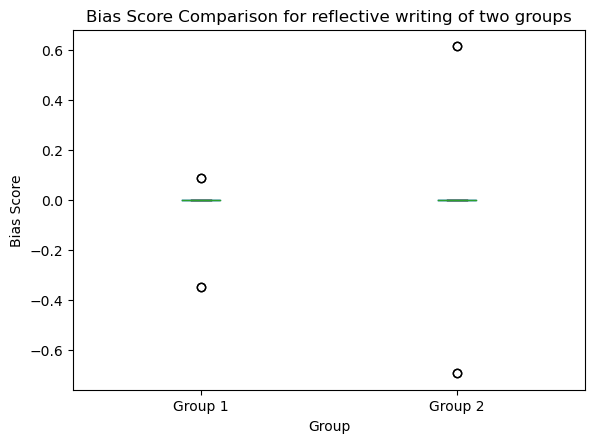

In [ ]:
from matplotlib import pyplot as plt
# Create a box plot
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
boxplot = data_to_plot.boxplot(by='Group', column=['Bias Score'], grid=False)

plt.title('Bias Score Comparison for reflective writing of two groups')  # Title for the box plot
plt.suptitle('')  # Get rid of the automatic 'Group by' title
plt.xlabel('Group')  # Label for the x-axis
plt.ylabel('Bias Score')  # Label for the y-axis
plt.show()  # Display the plot


<Axes: >

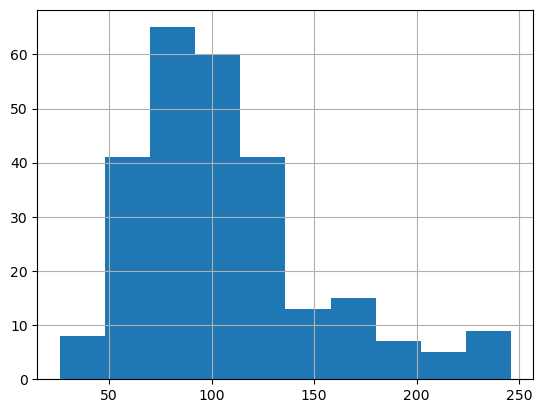

In [ ]:
g1.cnt_words.hist()